# Proyecto de Machine Learning:

Predicción de Temperatura de la CDMX con Regresión Lineal


# 1. Librerias

In [49]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

# 2. Carga y Exploración de Datos

In [2]:
# Cargar el archivo Excel
path = r'C:\Users\Ernes\OneDrive\Documents\Modelos ML\Clima\cleaned_weather_data.xlsx'
df = pd.read_excel(path)

In [3]:
df.head()

,Condition,Temperature (°C),Wind Speed (km/h),Pressure (hPa),Visibility (km),Humidity
0,Passing clouds,15.000000,14.48406,1026.076170,14.48406,0.77
1,Passing clouds,15.000000,9.65604,1025.737531,14.48406,0.77
2,Passing clouds,15.000000,9.65604,1009.144220,12.87472,0.77
3,Partly cloudy,13.888889,9.65604,1025.060253,11.26538,0.82
4,Partly cloudy,13.888889,8.04670,1024.721614,11.26538,0.82


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Condition          780 non-null    object 
 1   Temperature (°C)   780 non-null    float64
 2   Wind Speed (km/h)  780 non-null    float64
 3   Pressure (hPa)     780 non-null    float64
 4   Visibility (km)    780 non-null    float64
 5   Humidity           780 non-null    float64
dtypes: float64(5), object(1)
memory usage: 36.7+ KB


## Estadística descriptiva

In [5]:
cualitative = df["Condition"].value_counts() #Los datos categoricos que hay y cuantas veces se observan
cualitative

Passing clouds                      170
Mostly cloudy                       110
Scattered clouds                     80
Partly cloudy                        69
Partly sunny                         68
Clear                                66
Broken clouds                        64
Sunny                                63
More clouds than sun                 22
Overcast                             20
Light rain. Mostly cloudy            18
Fog                                   9
Light rain. More clouds than sun      5
Cloudy                                4
Light rain. Overcast                  4
Rain. Cloudy                          3
Drizzle. Mostly cloudy                2
Rain. Mostly cloudy                   1
Light rain. Partly cloudy             1
Light rain. Passing clouds            1
Name: Condition, dtype: int64

In [6]:
df.describe() #Estadistica descriptiva

,Temperature (°C),Wind Speed (km/h),Pressure (hPa),Visibility (km),Humidity
count,780.000000,780.000000,780.000000,780.00000,780.000000
mean,16.339744,11.614070,1023.386161,12.97582,0.601564
std,3.699887,6.577955,7.142181,3.52717,0.186730
min,6.111111,0.000000,1001.355523,1.60934,0.110000
25%,13.888889,8.046700,1016.848257,11.26538,0.460000
50%,16.111111,11.265380,1026.076170,12.87472,0.630000
75%,18.888889,14.484060,1028.446643,16.09340,0.722500
max,25.000000,38.624160,1032.848950,24.14010,1.000000


## Histogramas para explorar distribuciones

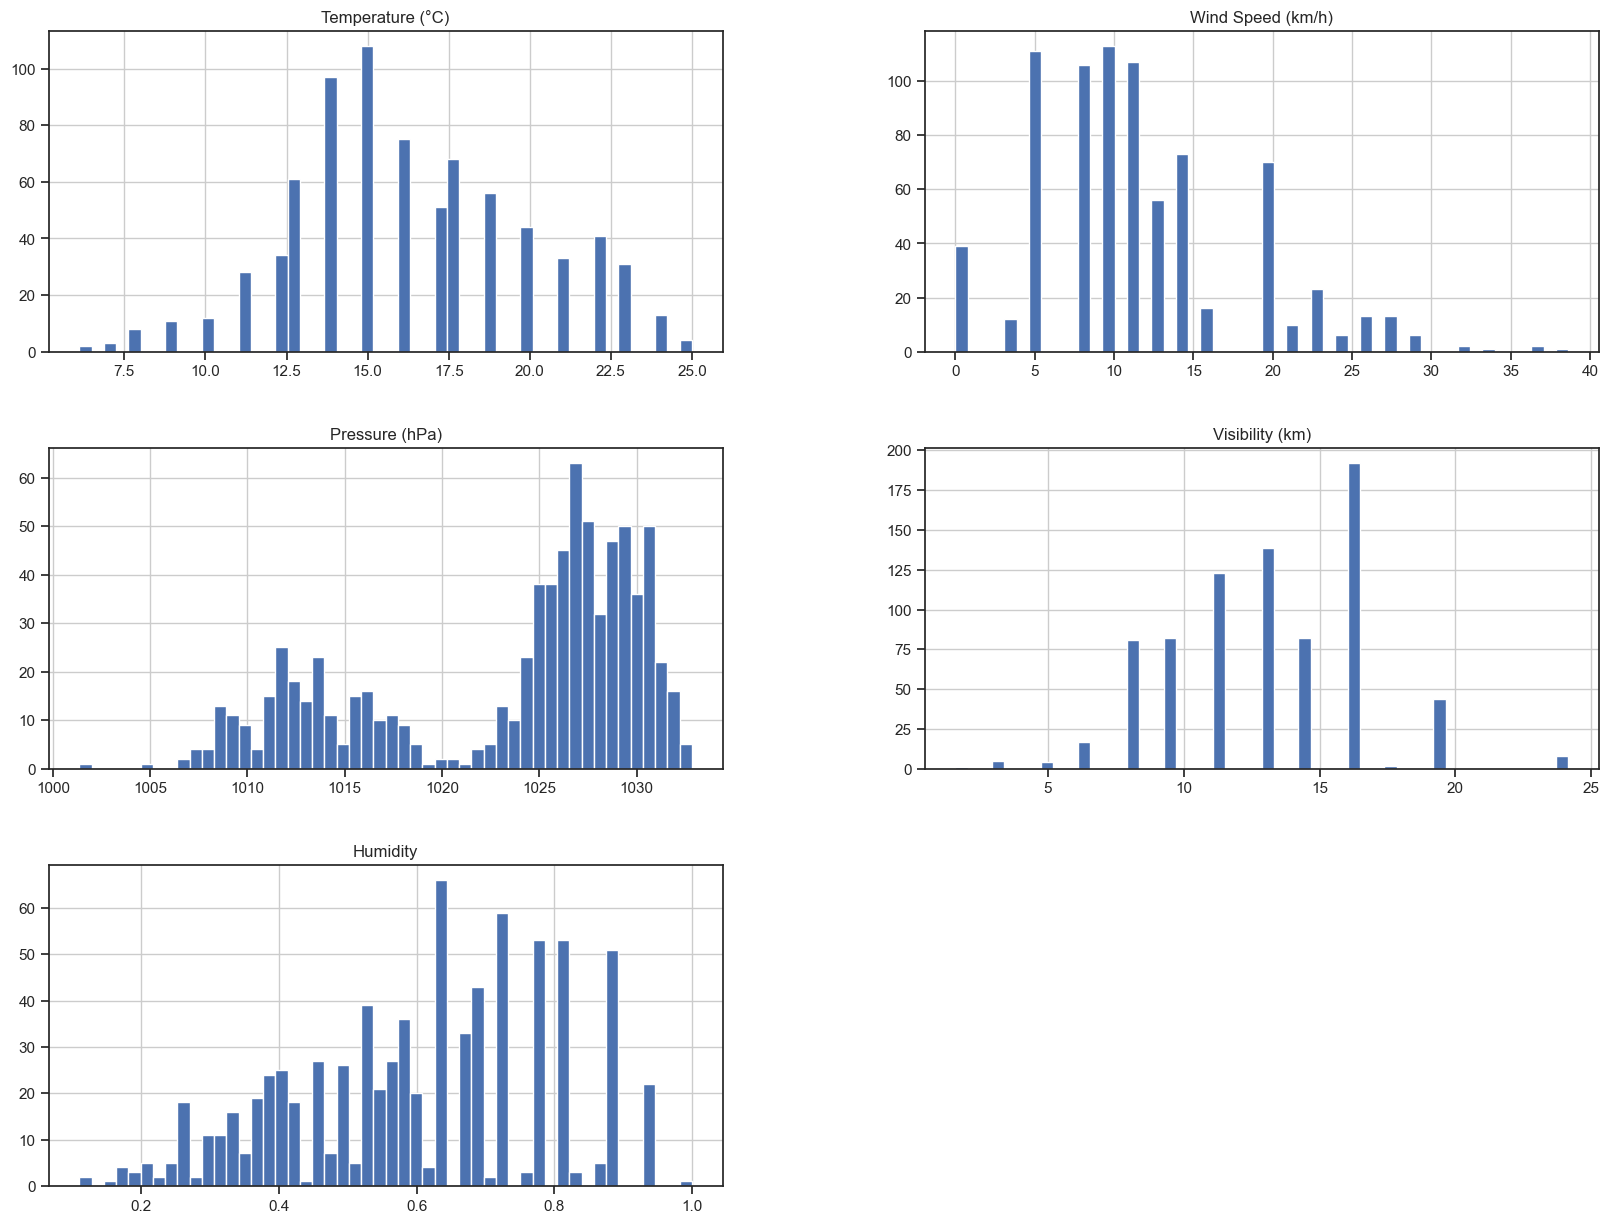

In [7]:
#Histogramas de los datos
df.hist(bins=50,figsize=(20,15))
plt.show()

## Matriz de dispersión para ver relaciones

array([[<Axes: xlabel='Temperature (°C)', ylabel='Temperature (°C)'>,
        <Axes: xlabel='Wind Speed (km/h)', ylabel='Temperature (°C)'>,
        <Axes: xlabel='Pressure (hPa)', ylabel='Temperature (°C)'>,
        <Axes: xlabel='Visibility (km)', ylabel='Temperature (°C)'>,
        <Axes: xlabel='Humidity', ylabel='Temperature (°C)'>],
       [<Axes: xlabel='Temperature (°C)', ylabel='Wind Speed (km/h)'>,
        <Axes: xlabel='Wind Speed (km/h)', ylabel='Wind Speed (km/h)'>,
        <Axes: xlabel='Pressure (hPa)', ylabel='Wind Speed (km/h)'>,
        <Axes: xlabel='Visibility (km)', ylabel='Wind Speed (km/h)'>,
        <Axes: xlabel='Humidity', ylabel='Wind Speed (km/h)'>],
       [<Axes: xlabel='Temperature (°C)', ylabel='Pressure (hPa)'>,
        <Axes: xlabel='Wind Speed (km/h)', ylabel='Pressure (hPa)'>,
        <Axes: xlabel='Pressure (hPa)', ylabel='Pressure (hPa)'>,
        <Axes: xlabel='Visibility (km)', ylabel='Pressure (hPa)'>,
        <Axes: xlabel='Humidity', ylabel='P

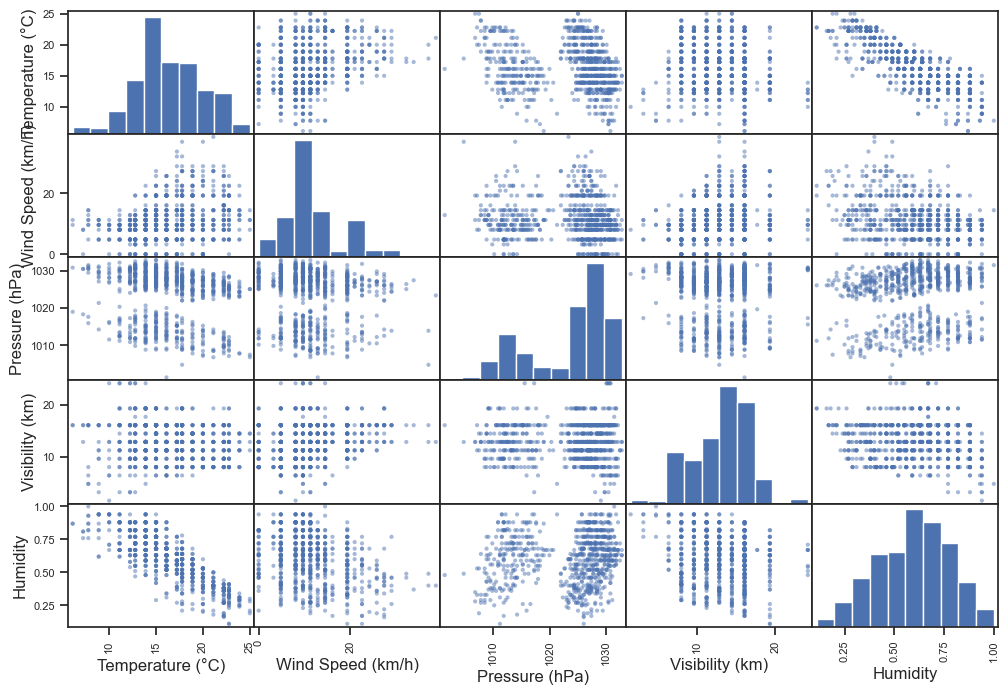

In [8]:
attributes = ['Temperature (°C)','Wind Speed (km/h)','Pressure (hPa)','Visibility (km)','Humidity']
scatter_matrix(df[attributes], figsize=(12, 8))

## Matriz de correlación respecto a la temperatura

In [9]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix["Temperature (°C)"].sort_values(ascending=False)

Temperature (°C)     1.000000
Wind Speed (km/h)    0.295280
Visibility (km)     -0.096317
Pressure (hPa)      -0.176232
Humidity            -0.817590
Name: Temperature (°C), dtype: float64

# 3. Preparación de Datos

In [50]:
#Definimos variables dependiente e independientes
X = df[['Wind Speed (km/h)','Pressure (hPa)','Visibility (km)','Humidity']]
y = df['Temperature (°C)']

#Estandarizacion
escalador = preprocessing.StandardScaler()
X_stand = escalador.fit_transform(X)
#Modelo 
modelo_temperatura = LinearRegression()

## Validación Cruzada del Modelo

In [ ]:
# Validación cruzada inicial
cross_val_score(
    modelo_temperatura,
    X_stand,y,
    scoring='neg_root_mean_squared_error',
    cv = 5 #Cuantas validaciones se quieren realizar
)

array([-2.15356938, -2.98847229, -1.65398438, -1.93394721, -1.43771871])

In [ ]:
# Evaluamos con diferentes particiones de validación
rmse_validacion = [
    -cross_val_score(
        modelo_temperatura,X,y,
        scoring= 'neg_root_mean_squared_error',
        cv=x
    ).mean() for x in range(10,100)
]

In [54]:
evaluacion_cruzada = {'particiones': list(range(10,100)),
                      'rsme_validacion': rmse_validacion}
evaluacion_cruzada = pd.DataFrame(evaluacion_cruzada)
evaluacion_cruzada

,particiones,rsme_validacion
0,10,1.939050
1,11,1.950544
2,12,1.957035
3,13,1.884917
4,14,1.898832
...,...,...
85,95,1.691714
86,96,1.694782
87,97,1.690746
88,98,1.682140


## Gráfica de evolución del RMSE según las particiones

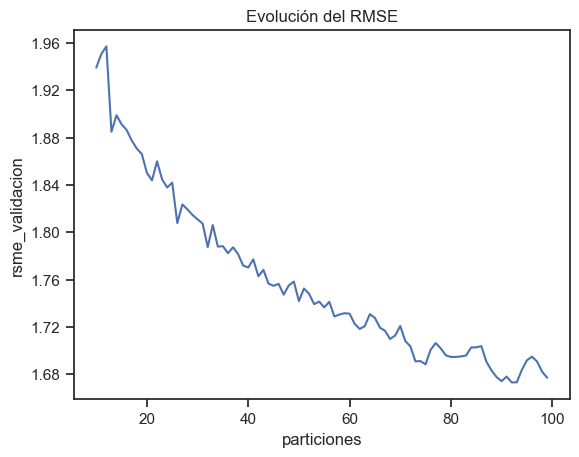

In [71]:
from matplotlib.ticker import MaxNLocator
sns.lineplot(x='particiones',y='rsme_validacion',data=evaluacion_cruzada)

ax = plt.gca()  # obtener el eje actual
ax.yaxis.set_major_locator(MaxNLocator(nbins=10))  # más ticks en Y
plt.title('Evolución del RMSE')

plt.show()

Se puede notar que el `RSME` del modelo se estabiliza alrdedos del 1.60-1.72. Esto indica que el modelo tiene un desempeño consistente y no depende demasiado de cómo se dividen los datos.

# Entrenamiento y Evaluación del Modelo Final

In [ ]:
# Función para evaluar el modelo
def evaluar_regression(y_pred,y,x):
    n = x.shape[0]
    k = x.shape[1]

    mae = metrics.mean_absolute_error(y,y_pred)
    mse = np.sqrt(metrics.mean_squared_error(y,y_pred))
    
    r2 = metrics.r2_score(y,y_pred)
    r2_adj = 1 - (1 - r2) * (n - 1) / (n - k - 1)


    return {'mae': mae, 'rmse': mse, 'r2': r2, 'r2_adj': r2_adj}

In [ ]:
from sklearn.model_selection import train_test_split

# Dividimos en train/test
X_train, X_test, y_train, y_test = train_test_split(X_stand,y,test_size=0.20,random_state=42)

In [ ]:
# Entrenamos el modelo
modelo_final = LinearRegression()
modelo_final.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# Predicciones
y_predic = modelo_final.predict(X_test)

## Evaluación

In [66]:
evaluar_regression(y_predic,y_test,X_test)

{'mae': 1.5016911471340684,
 'rmse': 1.9567974261240866,
 'r2': 0.7360752978568392,
 'r2_adj': 0.7290839150186098}

### Interpretación

- La regresión lineal logra un $R^2 \approx 0.74$, lo que indica un buen poder predictivo.
- El error medio absoluto ($MAE \approx 1.5 °C $) es relativamente bajo. En promedio, las predicciones del modelo se equivocan por 1 grado y medio, lo cual es un error bajo y aceptable en un contexto de predicción de temperatura.

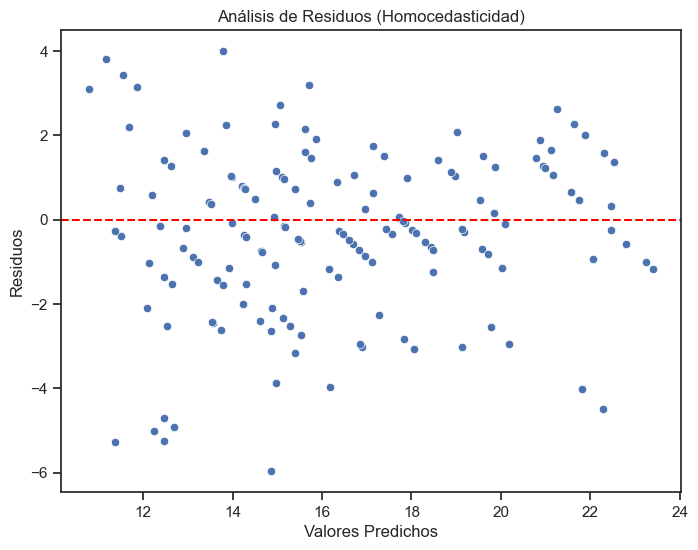

In [70]:
# Residuos
residuos = y_test - y_predic

# Gráfico de residuos vs predicciones
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_predic, y=residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Análisis de Residuos (Homocedasticidad)")
plt.show()

- Los errores se distribuyen aleatoriamente alrededor de 0, sin mostrar patrones sistemáticos ni efecto de embudo.

- Esto significa que el modelo cumple la suposición de homocedasticidad, lo cual valida el uso de regresión lineal.

# Conclusión

El modelo de regresión lineal múltiple desarrollado resulta óptimo para nuestra base de datos meteorológica, mostrando un buen ajuste y un equilibrio entre precisión e interpretabilidad, 
- Logra explicar aproximadamente un $74\%$ con un error de $1.5 °C$.

El modelo no solo alcanza una buena capacidad predictiva, sino que también mantiene consistencia estadística y solidez metodológica, lo que lo convierte en una herramienta confiable para predecir temperaturas a partir de condiciones meteorológicas observadas.

In [ ]:
#Guardamos el modelo entrenado y la estandarizacion
import joblib
joblib.dump(modelo_final, "modelo_temperatura.pkl")
joblib.dump(escalador, "scaler.pkl")

['scaler.pkl']